# Integrating the Simple Linear Regression on Salary_Data

### Importing the Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
salary = pd.read_csv('Salary_Data.csv')

In [27]:
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [21]:
print('rows, columns')
salary.shape

rows, columns


(30, 2)

### Sorting the Dataset into Matrix of features (x) and Dependent variable (y)

In [4]:
x = salary.iloc[:, :-1].values
y = salary.iloc[:, -1].values

In [5]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [6]:
salary.isnull().values.any()

False

### Splitting dataset into Train and Test Dataset

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [8]:
x_test

array([[5.3],
       [7.1],
       [3.9],
       [6. ],
       [4.5],
       [6.8]])

### Training the model to learn the pattern of the dataset

In [9]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [10]:
y_pred = reg.predict(x_test)

In [24]:
y_pred

array([75074.51, 91873.81, 62008.38, 81607.57, 67608.15, 89073.92])

### Visualize how well the model has learned the pattern

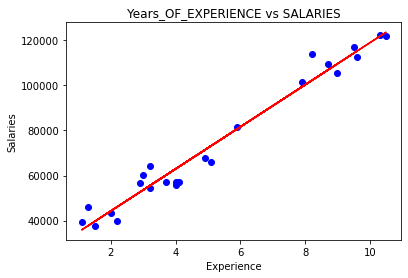

In [11]:
plt.scatter(x_train, y_train, color = 'blue')
plt.plot(x_train, reg.predict(x_train), color = 'red')
plt.title('Years_OF_EXPERIENCE vs SALARIES')
plt.xlabel('Experience')
plt.ylabel('Salaries')
plt.show()

In [13]:
np.set_printoptions(precision=2)

In [14]:
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[75074.51 83088.  ]
 [91873.81 98273.  ]
 [62008.38 63218.  ]
 [81607.57 93940.  ]
 [67608.15 61111.  ]
 [89073.92 91738.  ]]


In [15]:
print("The Salary in dollars for '1 year six months' experience is: $",reg.predict([[1.5]]))

The Salary in dollars for '1 year six months' experience is: $ [39609.32]


In [16]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [17]:
print(reg.coef_)
print(reg.intercept_)

[9332.94]
25609.89799835482


## The Equation for the Simple Linear Regression is:

### y = 9332.94 X + 25609.898

In [18]:
reg.predict([[1.3]])

array([37742.73])

### Calculating the r score to check how well the model has learnt the relationship of the data

In [25]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7616681465472094